### Data Dictionary

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

from tpot import TPOTClassifier, TPOTRegressor
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Data Exploration

In [2]:
df = pd.read_csv("ChurnData.csv")

In [3]:
df

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     longmon  tollmon  equipmon  cardmon  wiremon  longten  tollten  cardten  \
0       4.40    20.75      0.00    15.25     35.7    42.00   211.45    125.0   
1       9.45     0.00      0.00     0.00      0.0   288.80     0.00      0.0   
2       6.30     0.00      0.00     0.00      0.0   157.05     0.00      0.0   
3       6.05    45.00     50.10    23.25     64.9   239.55  1873.05    880.0   
4       7.10    22.00      0.00    23.75      0.0    47.45   166.10    145.0   
..       ...      ...       ...      ...      ...      ...      ...      ...   
195    17.35    24.50      0.00    14.25      0.0   973.10  1343.50    720.0   
196     6.00    28.00      0.00    12.75      0.0   203.25   959.40    435.0   
197     3.85    23.75      0.00    12.50      0.0    29.90   128.45     80.0   
198     8.70    47.75      0.00    32.75     64.0   186.60  1152.90    780.0   
199    16.85     0.00     42.55    26.50     44.1  1063.15     0.00   1600.0   

     voice  pager  internet  callwait  confer  ebill  loglong  logtoll  lninc  \
0      1.0    1.0       0.0       1.0     1.0    0.0    1.482    3.033  4.913   
1      0.0    0.0       0.0       0.0     0.0    0.0    2.246    3.240  3.497   
2      0.0    0.0       0.0       0.0     1.0    0.0    1.841    3.240  3.401   
3      1.0    1.0       1.0       1.0     1.0    1.0    1.800    3.807  4.331   
4      1.0    0.0       0.0       1.0     1.0    0.0    1.960    3.091  4.382   
..     ...    ...       ...       ...     ...    ...      ...      ...    ...   
195    0.0    0.0       0.0       0.0     1.0    0.0    2.854    3.199  4.419   
196    0.0    0.0       0.0       1.0     1.0    0.0    1.792    3.332  3.178   
197    0.0    0.0       0.0       1.0     1.0    0.0    1.348    3.168  3.850   
198    1.0    1.0       1.0       1.0     1.0    1.0    2.163    3.866  3.219   
199    0.0    0.0       1.0       0.0     0.0    1.0    2.824    3.240  5.247   

     custcat  churn  
0        4.0    1.0  
1        1.0    1.0  
2        3.0    0.0  
3        4.0    0.0  
4        3.0    0.0  
..       ...    ...  
195      3.0    0.0  
196      3.0    0.0  
197      3.0    0.0  
198      4.0    1.0  
199      2.0    0.0  

[200 rows x 28 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
df.describe(include='all')

tenure         age     address       income         ed     employ  \
count  200.000000  200.000000  200.000000   200.000000  200.00000  200.00000   
mean    35.505000   41.165000   11.650000    75.130000    2.82500   10.22500   
std     21.640971   13.076803   10.158419   128.430468    1.28555    8.95743   
min      1.000000   19.000000    0.000000     9.000000    1.00000    0.00000   
25%     16.750000   31.000000    3.000000    31.000000    2.00000    3.00000   
50%     33.500000   40.000000    9.000000    48.000000    3.00000    7.50000   
75%     55.250000   51.000000   18.000000    80.000000    4.00000   17.00000   
max     72.000000   76.000000   48.000000  1668.000000    5.00000   44.00000   

            equip    callcard    wireless    longmon     tollmon    equipmon  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.425000    0.705000    0.290000   11.78925   13.240000   15.783250   
std      0.495584    0.457187    0.454901    9.88725   15.643842   19.557103   
min      0.000000    0.000000    0.000000    1.10000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    5.53750    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    8.25000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000   14.30000   24.750000   33.012500   
max      1.000000    1.000000    1.000000   62.30000   68.500000   63.250000   

          cardmon   wiremon      longten      tollten      cardten  \
count  200.000000  200.0000   200.000000   200.000000   200.000000   
mean    14.358750   12.2170   577.770750   507.007500   650.663750   
std     14.781269   21.6326   746.608653   820.027858   941.470689   
min      0.000000    0.0000     1.100000     0.000000     0.000000   
25%      0.000000    0.0000    79.337500     0.000000     0.000000   
50%     12.500000    0.0000   289.525000     0.000000   342.500000   
75%     20.750000   23.4625   806.762500   724.162500   921.250000   
max    109.250000  109.7000  4333.000000  4938.600000  7515.000000   

            voice       pager    internet   callwait      confer       ebill  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.295000    0.275000    0.440000    0.45500    0.460000    0.440000   
std      0.457187    0.447635    0.497633    0.49922    0.499648    0.497633   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

          loglong     logtoll       lninc     custcat       churn  
count  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     2.193285    3.229185    3.951015    2.475000    0.290000  
std      0.731282    0.281019    0.752553    1.079445    0.454901  
min      0.095000    1.749000    2.197000    1.000000    0.000000  
25%      1.711750    3.226500    3.434000    2.000000    0.000000  
50%      2.110000    3.240000    3.871000    2.000000    0.000000  
75%      2.660000    3.240000    4.382000    3.000000    1.000000  
max      4.132000    4.227000    7.419000    4.000000    1.000000

In [6]:
df.shape

(200, 28)

In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

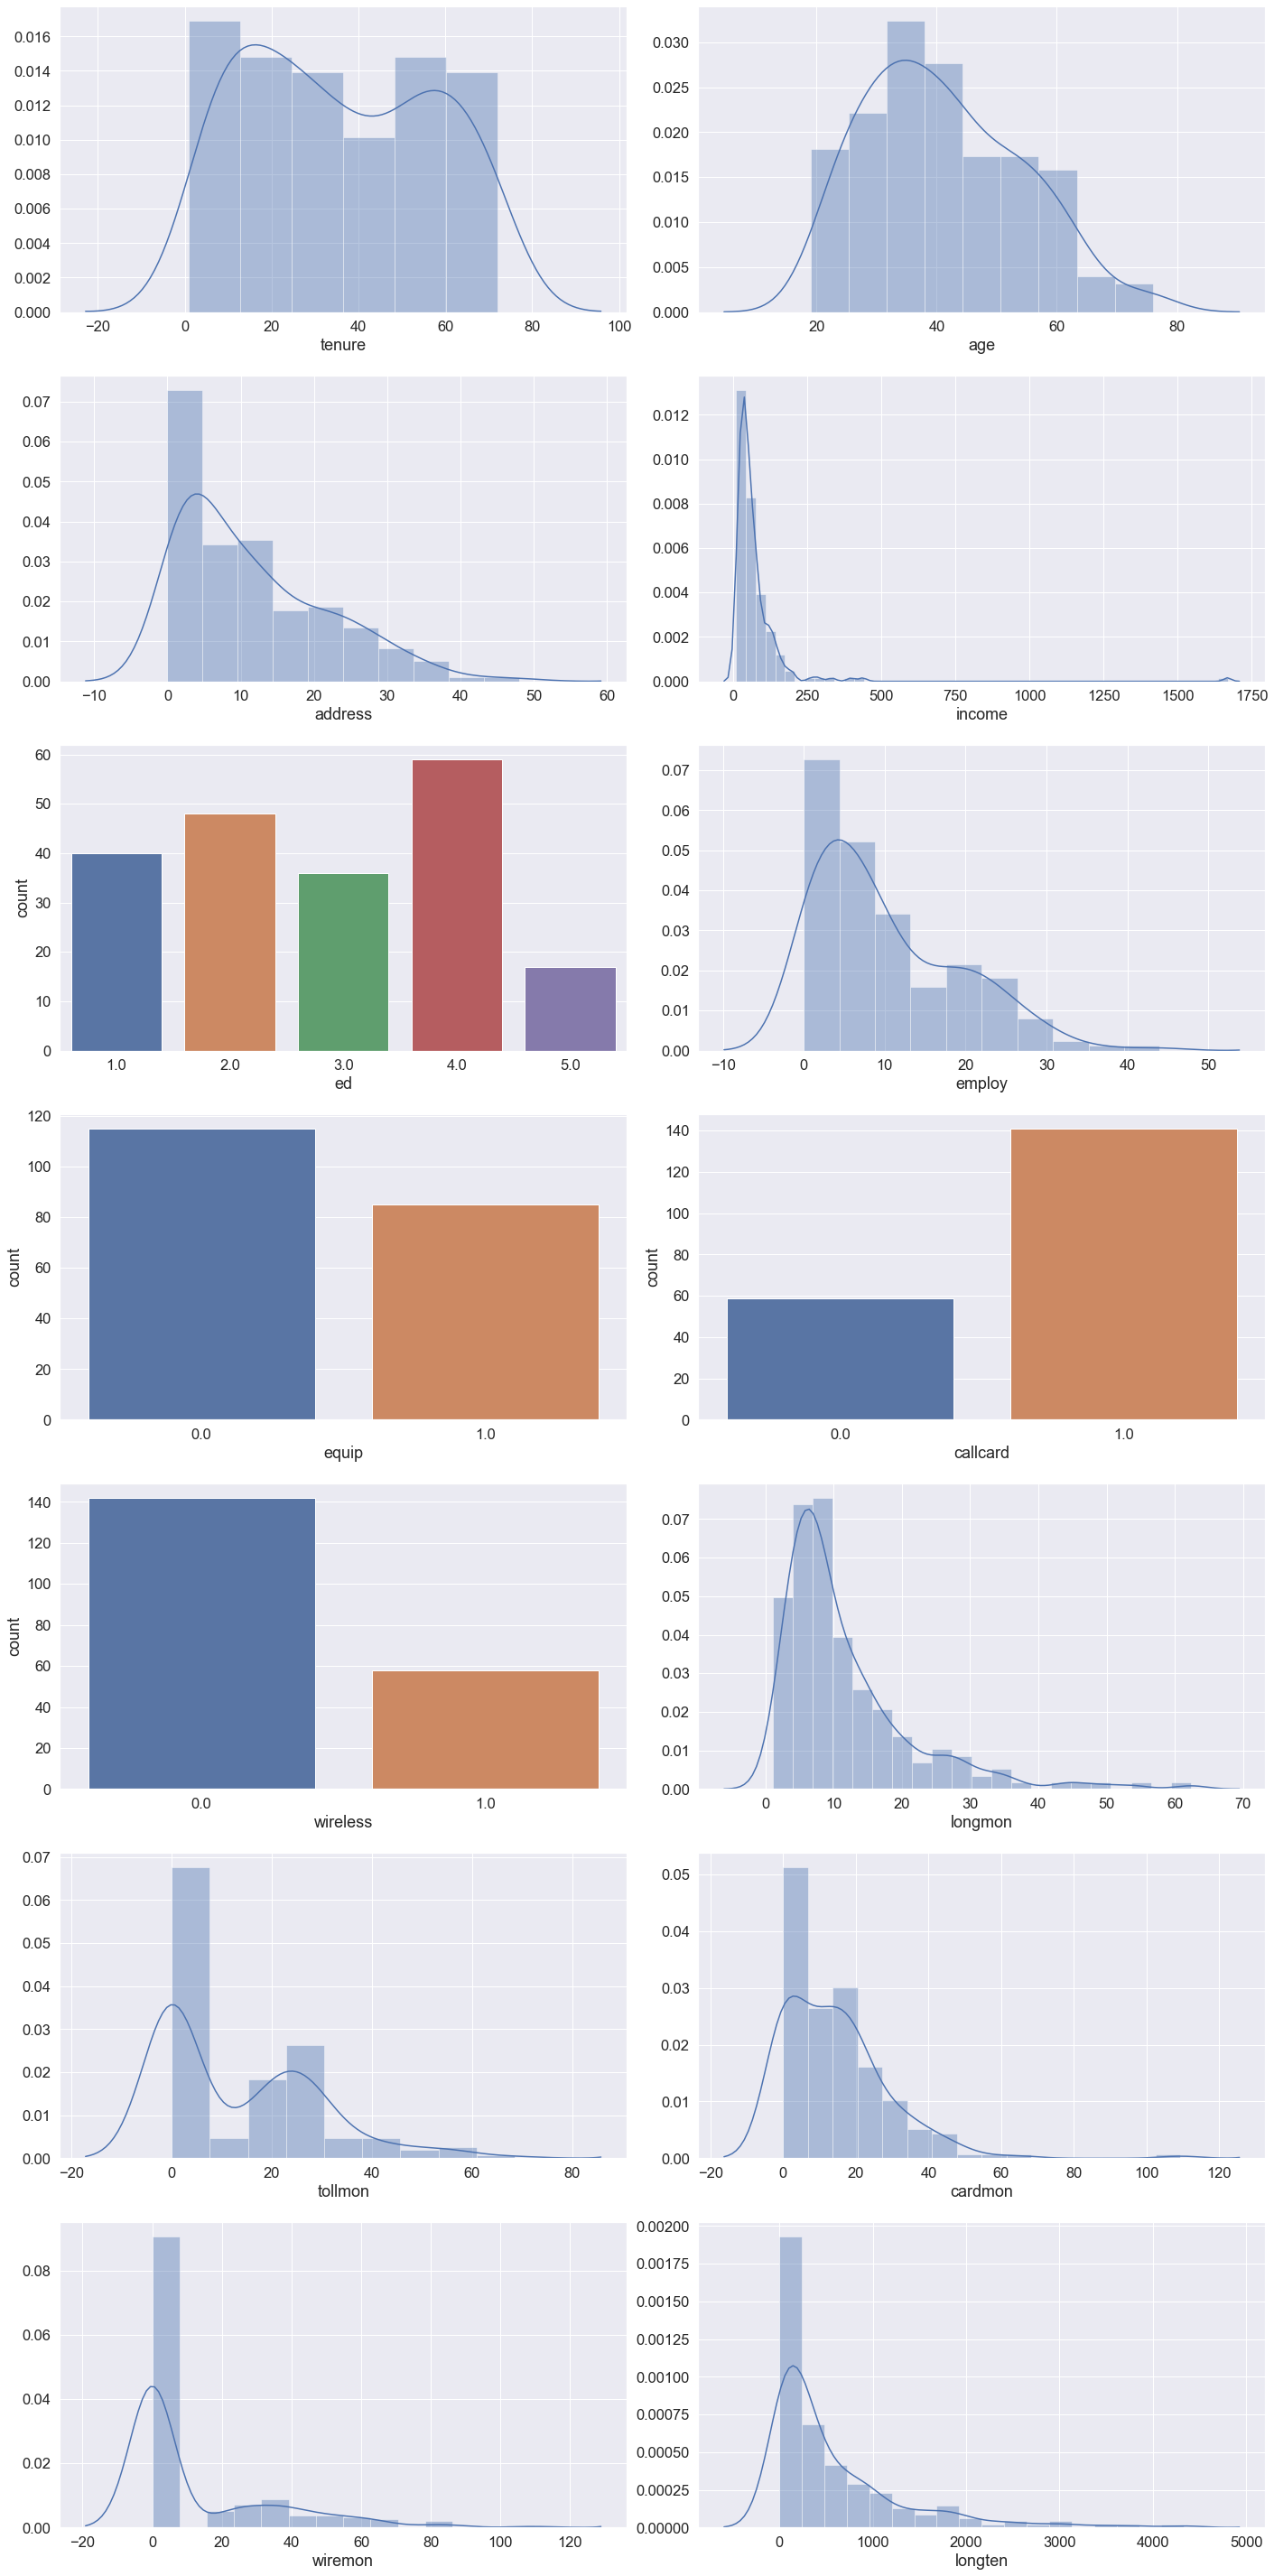

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.tenure)
plt.subplot(7,2,2)
sns.distplot(df.age)
plt.subplot(7,2,3)
sns.distplot(df.address)
plt.subplot(7,2,4)
sns.distplot(df.income)
plt.subplot(7,2,5)
sns.countplot(df.ed)
plt.subplot(7,2,6)
sns.distplot(df.employ)
plt.subplot(7,2,7)
sns.countplot(df.equip)
plt.subplot(7,2,8)
sns.countplot(df.callcard)
plt.subplot(7,2,9)
sns.countplot(df.wireless)
plt.subplot(7,2,10)
sns.distplot(df.longmon)
plt.subplot(7,2,11)
sns.distplot(df.tollmon)
plt.subplot(7,2,12)
sns.distplot(df.cardmon)
plt.subplot(7,2,13)
sns.distplot(df.wiremon)
plt.subplot(7,2,14)
sns.distplot(df.longten)

plt.tight_layout()
plt.show()

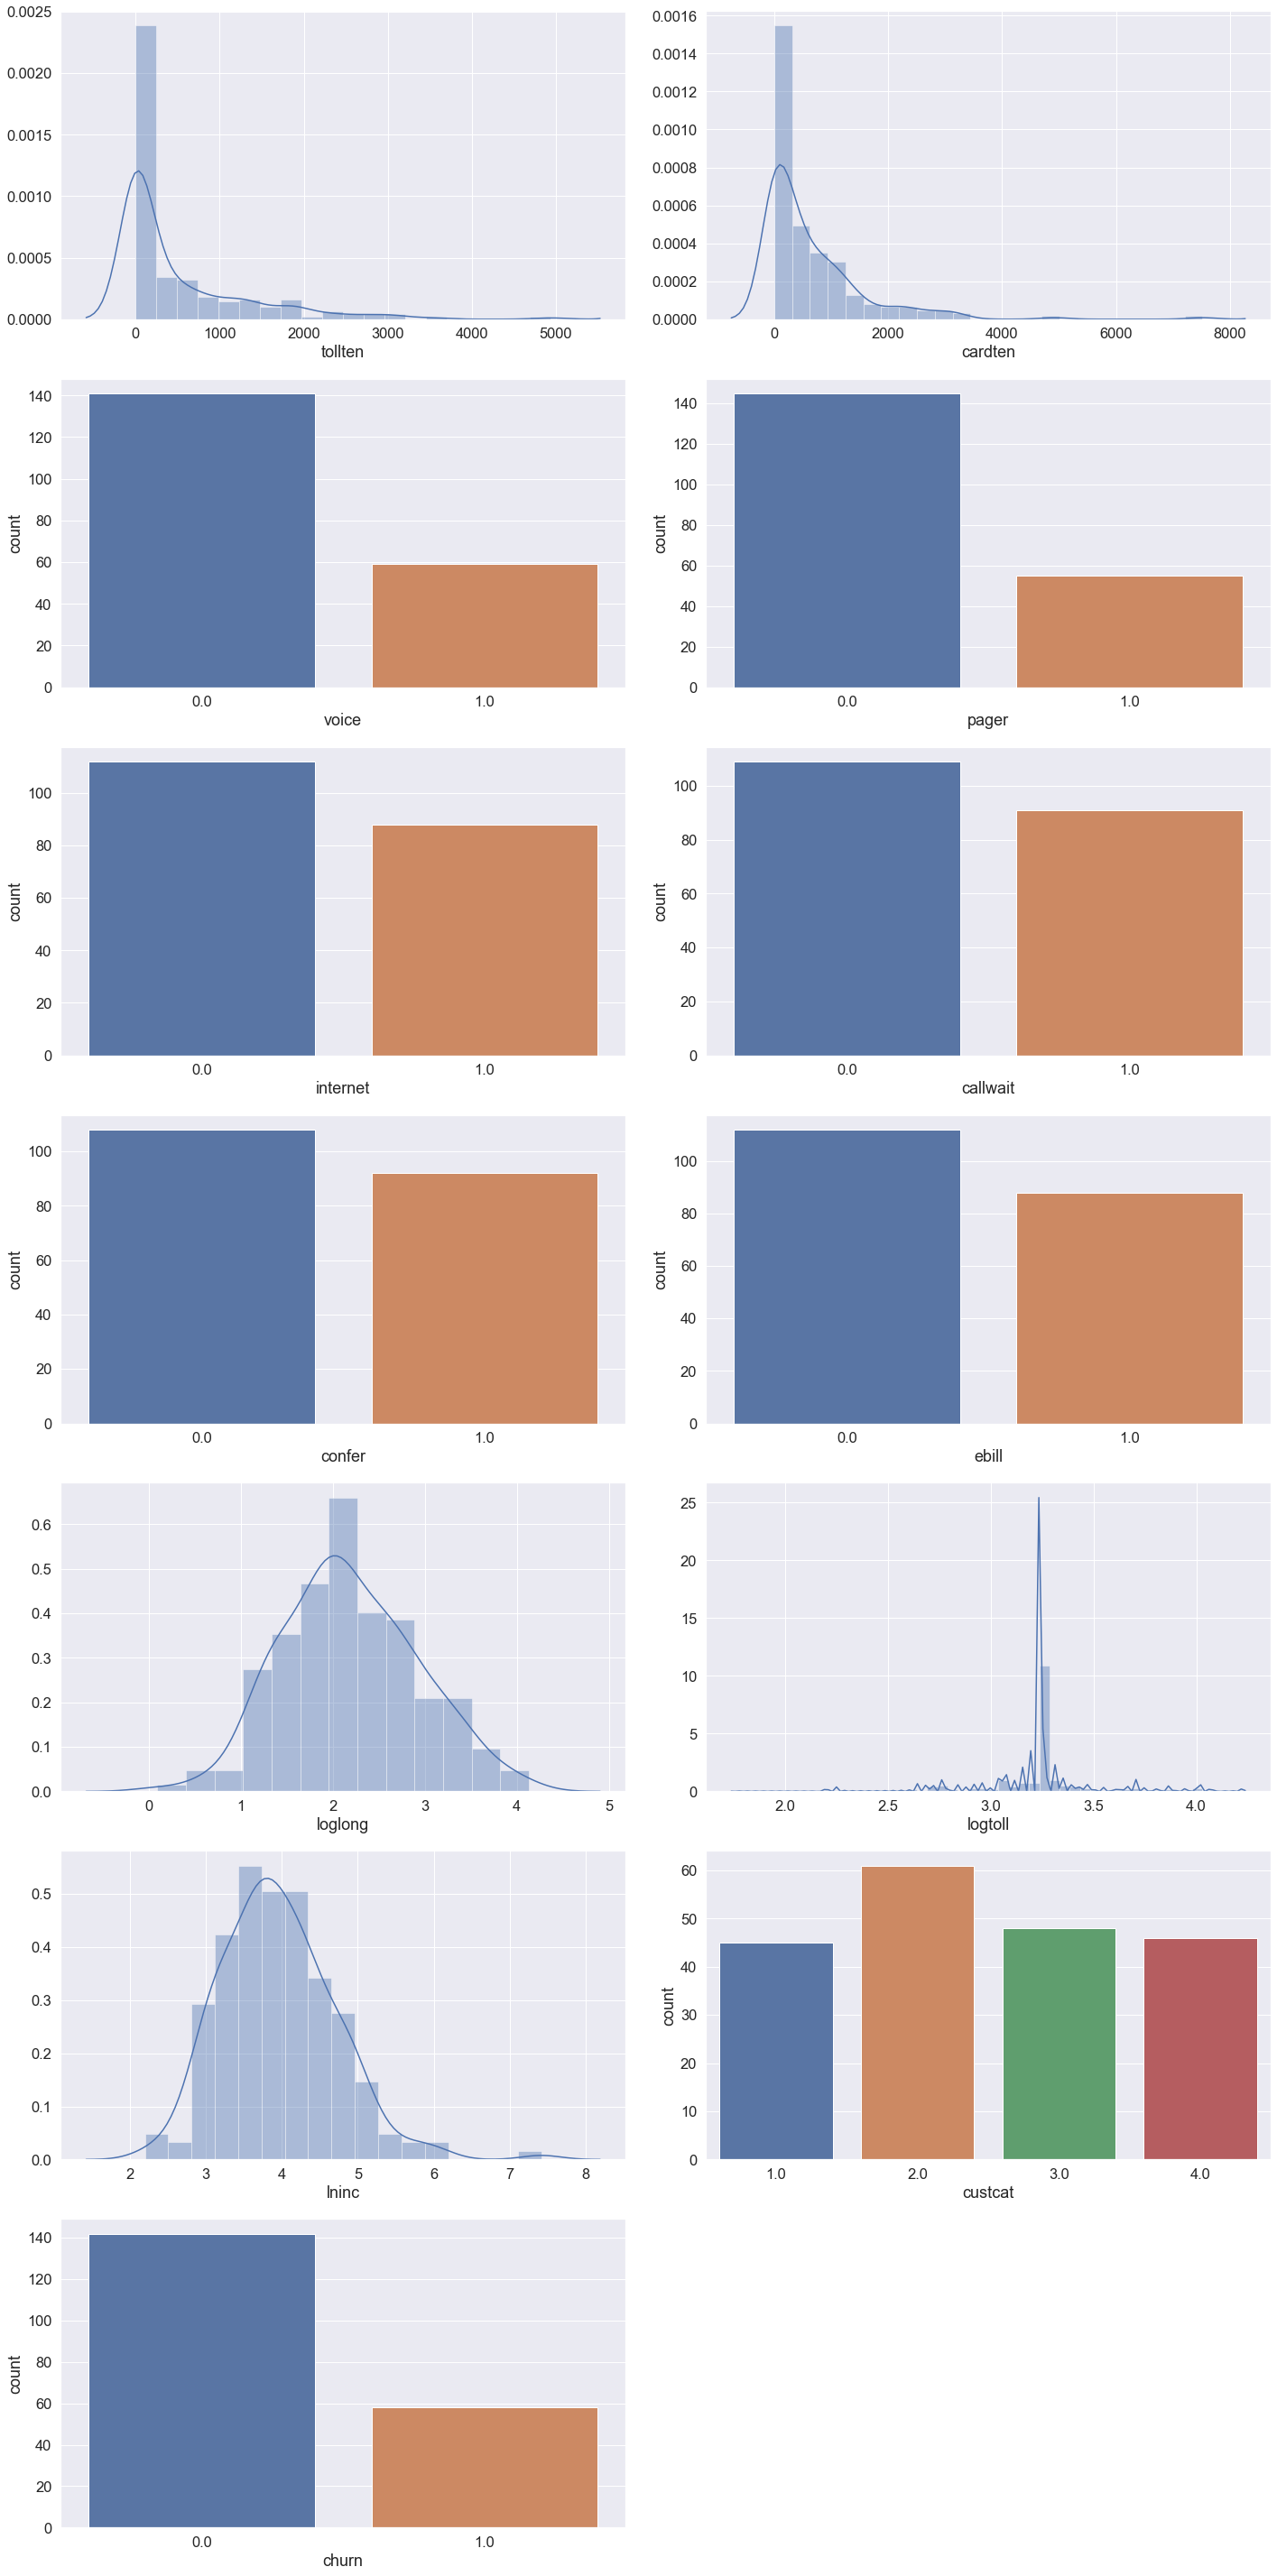

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.tollten)
plt.subplot(7,2,2)
sns.distplot(df.cardten)
plt.subplot(7,2,3)
sns.countplot(df.voice)
plt.subplot(7,2,4)
sns.countplot(df.pager)
plt.subplot(7,2,5)
sns.countplot(df.internet)
plt.subplot(7,2,6)
sns.countplot(df.callwait)
plt.subplot(7,2,7)
sns.countplot(df.confer)
plt.subplot(7,2,8)
sns.countplot(df.ebill)
plt.subplot(7,2,9)
sns.distplot(df.loglong)
plt.subplot(7,2,10)
sns.distplot(df.logtoll)
plt.subplot(7,2,11)
sns.distplot(df.lninc)
plt.subplot(7,2,12)
sns.countplot(df.custcat)
plt.subplot(7,2,13)
sns.countplot(df.churn)
# plt.subplot(7,2,14)
# sns.distplot(df.longten)

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [10]:
df.corr()

tenure       age   address    income        ed    employ  \
tenure    1.000000  0.431802  0.456328  0.109383 -0.070503  0.445755   
age       0.431802  1.000000  0.746566  0.211275 -0.071509  0.622553   
address   0.456328  0.746566  1.000000  0.132807 -0.145550  0.520926   
income    0.109383  0.211275  0.132807  1.000000  0.141241  0.345161   
ed       -0.070503 -0.071509 -0.145550  0.141241  1.000000 -0.213886   
employ    0.445755  0.622553  0.520926  0.345161 -0.213886  1.000000   
equip    -0.117102 -0.071357 -0.148977 -0.010741  0.488041 -0.174470   
callcard  0.426530  0.170404  0.209204 -0.019969 -0.071178  0.266612   
wireless -0.070590 -0.065527 -0.146478 -0.029635  0.267670 -0.101187   
longmon   0.763134  0.373547  0.421782  0.041808 -0.072735  0.363386   
tollmon   0.100214  0.053595 -0.015564 -0.003701 -0.000712  0.117962   
equipmon -0.043274 -0.030402 -0.125212  0.000275  0.492999 -0.141651   
cardmon   0.489857  0.203202  0.297395 -0.013513 -0.070990  0.219413   
wiremon   0.043067 -0.003685 -0.113143 -0.027998  0.288571 -0.045539   
longten   0.796355  0.393370  0.447256  0.048374 -0.083032  0.385254   
tollten   0.398869  0.187221  0.129141 -0.000262 -0.016257  0.240498   
cardten   0.676920  0.336903  0.406964  0.019358 -0.069499  0.309183   
voice    -0.050686  0.019555 -0.069627  0.085525  0.233628 -0.035922   
pager     0.018791  0.006803 -0.105812  0.056977  0.258698  0.038381   
internet -0.164921 -0.078395 -0.191058  0.102809  0.552996 -0.250044   
callwait -0.009747  0.020002 -0.019967  0.081133 -0.016247  0.119708   
confer    0.080650  0.030625 -0.030494 -0.031556 -0.132215  0.173247   
ebill    -0.099128 -0.048279 -0.172171 -0.041392  0.427315 -0.151965   
loglong   0.864388  0.379413  0.409357  0.065595 -0.054581  0.377186   
logtoll   0.310045  0.093600  0.018386 -0.156498 -0.007227  0.068718   
lninc     0.246353  0.313359  0.212929  0.680313  0.206718  0.540052   
custcat   0.134237  0.041055 -0.016841  0.030725  0.013127  0.131292   
churn    -0.376860 -0.287697 -0.260659 -0.090790  0.216112 -0.337969   

             equip  callcard  wireless   longmon   tollmon  equipmon  \
tenure   -0.117102  0.426530 -0.070590  0.763134  0.100214 -0.043274   
age      -0.071357  0.170404 -0.065527  0.373547  0.053595 -0.030402   
address  -0.148977  0.209204 -0.146478  0.421782 -0.015564 -0.125212   
income   -0.010741 -0.019969 -0.029635  0.041808 -0.003701  0.000275   
ed        0.488041 -0.071178  0.267670 -0.072735 -0.000712  0.492999   
employ   -0.174470  0.266612 -0.101187  0.363386  0.117962 -0.141651   
equip     1.000000 -0.087051  0.386735 -0.097618 -0.090516  0.941065   
callcard -0.087051  1.000000  0.220118  0.322514  0.352994  0.026955   
wireless  0.386735  0.220118  1.000000 -0.073043  0.462751  0.527573   
longmon  -0.097618  0.322514 -0.073043  1.000000  0.083771 -0.070876   
tollmon  -0.090516  0.352994  0.462751  0.083771  1.000000  0.061560   
equipmon  0.941065  0.026955  0.527573 -0.070876  0.061560  1.000000   
cardmon  -0.056590  0.629955  0.195387  0.493439  0.256158  0.025248   
wiremon   0.367579  0.259638  0.885879 -0.020392  0.561234  0.562497   
longten  -0.098271  0.342553 -0.088461  0.984808  0.080536 -0.066587   
tollten  -0.097151  0.292555  0.328256  0.338036  0.860230  0.039731   
cardten  -0.053837  0.448182  0.047773  0.673179  0.107951  0.005396   
voice     0.264481  0.226109  0.649721 -0.080503  0.455174  0.407651   
pager     0.308633  0.251069  0.667535 -0.001372  0.499124  0.461458   
internet  0.623509 -0.067146  0.343631 -0.223929  0.036393  0.631338   
callwait -0.034021  0.370878  0.389670  0.032913  0.678454  0.104341   
confer   -0.103499  0.311056  0.382925  0.060614  0.651039  0.056846   
ebill     0.603133 -0.045058  0.321433 -0.124605 -0.032998  0.602010   
loglong  -0.113065  0.351030 -0.042637  0.901631  0.082273 -0.062455   
logtoll  -0.027882  0.080060  0.178317  0.247302  0.440661  0.047387   
lninc     0.083494  0.156920  0.033558  0.122550  0

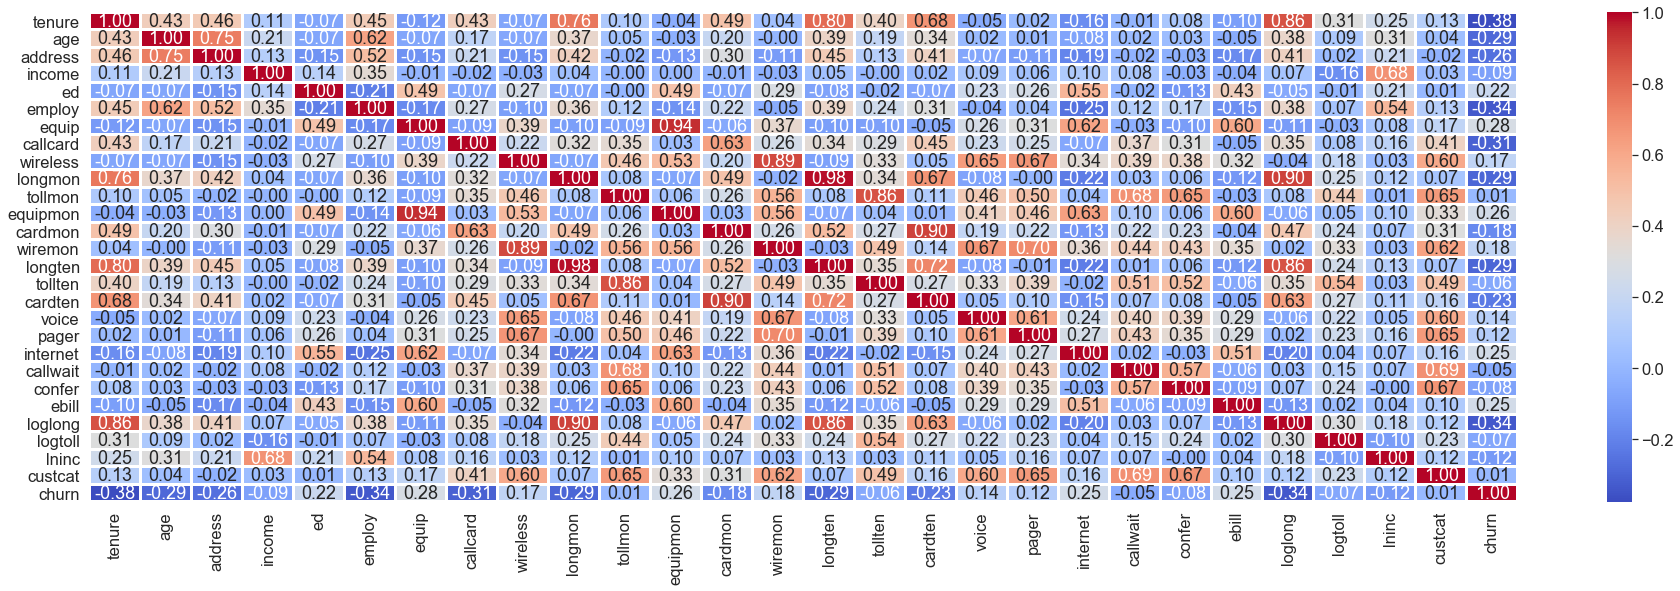

In [11]:
plt.figure(figsize=(32,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

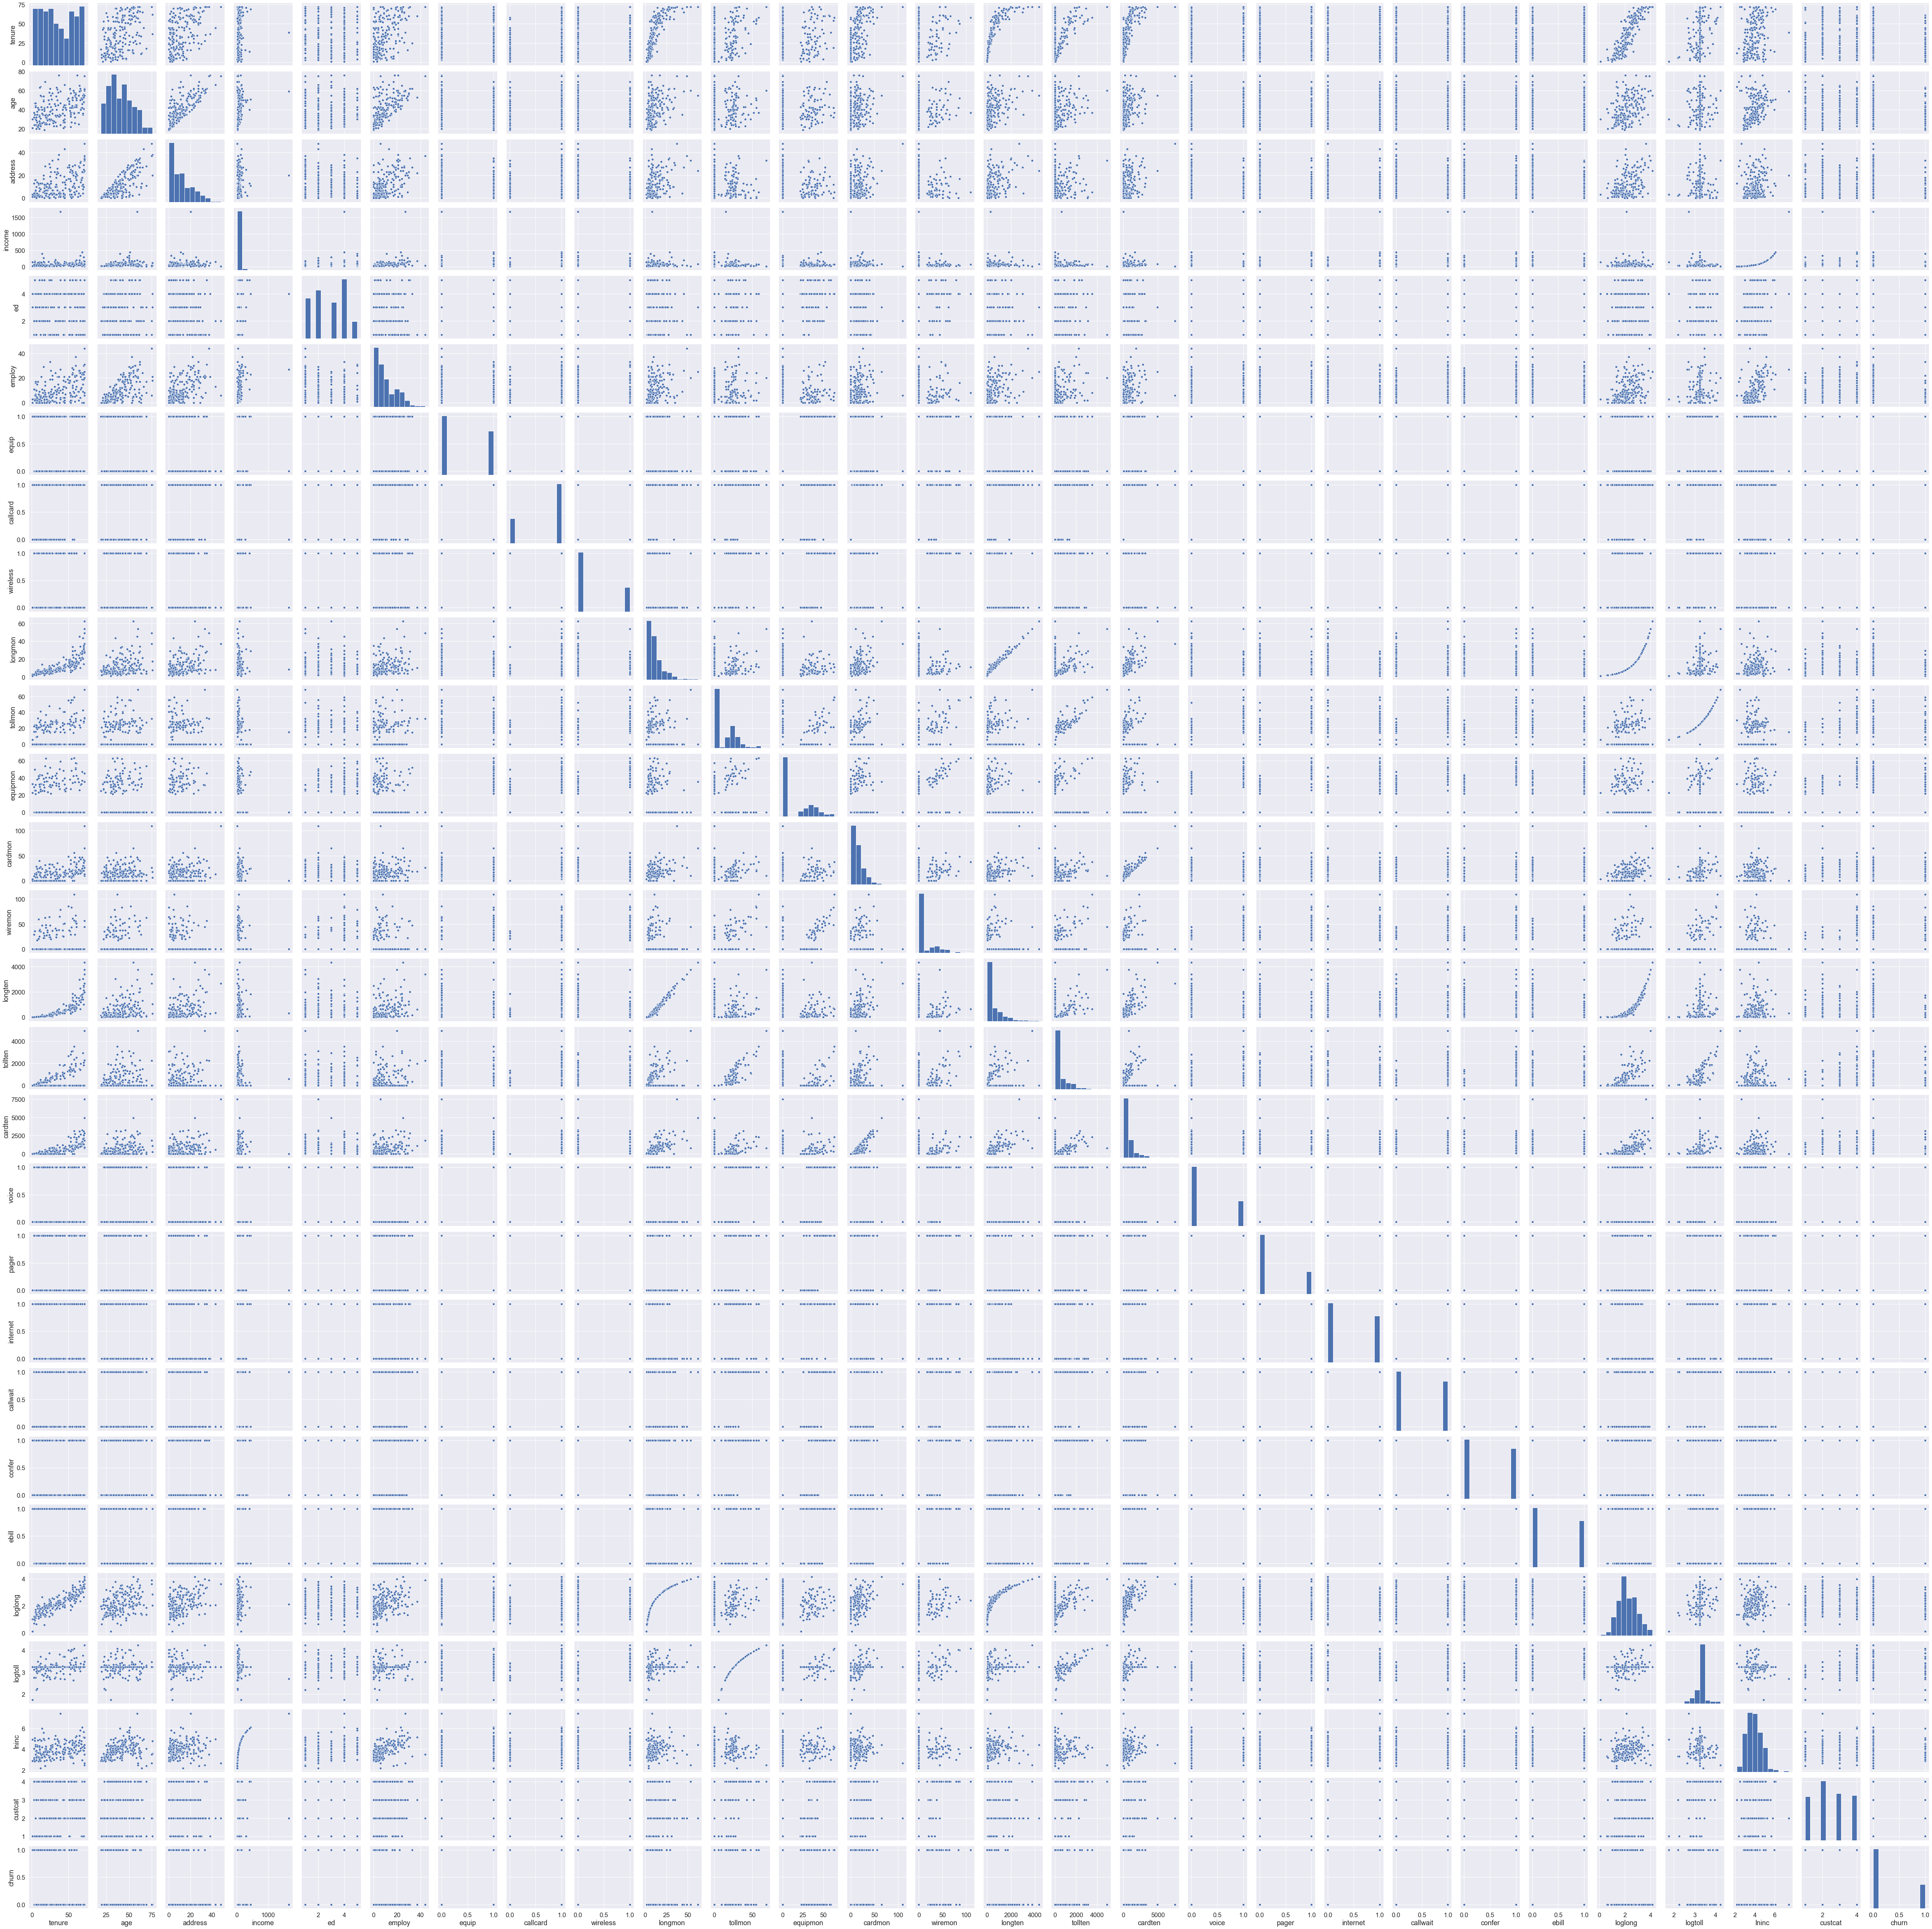

In [12]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [13]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [15]:
df.describe()

tenure         age     address       income         ed     employ  \
count  200.000000  200.000000  200.000000   200.000000  200.00000  200.00000   
mean    35.505000   41.165000   11.650000    75.130000    2.82500   10.22500   
std     21.640971   13.076803   10.158419   128.430468    1.28555    8.95743   
min      1.000000   19.000000    0.000000     9.000000    1.00000    0.00000   
25%     16.750000   31.000000    3.000000    31.000000    2.00000    3.00000   
50%     33.500000   40.000000    9.000000    48.000000    3.00000    7.50000   
75%     55.250000   51.000000   18.000000    80.000000    4.00000   17.00000   
max     72.000000   76.000000   48.000000  1668.000000    5.00000   44.00000   

            equip    callcard    wireless    longmon     tollmon    equipmon  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.425000    0.705000    0.290000   11.78925   13.240000   15.783250   
std      0.495584    0.457187    0.454901    9.88725   15.643842   19.557103   
min      0.000000    0.000000    0.000000    1.10000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    5.53750    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    8.25000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000   14.30000   24.750000   33.012500   
max      1.000000    1.000000    1.000000   62.30000   68.500000   63.250000   

          cardmon   wiremon      longten      tollten      cardten  \
count  200.000000  200.0000   200.000000   200.000000   200.000000   
mean    14.358750   12.2170   577.770750   507.007500   650.663750   
std     14.781269   21.6326   746.608653   820.027858   941.470689   
min      0.000000    0.0000     1.100000     0.000000     0.000000   
25%      0.000000    0.0000    79.337500     0.000000     0.000000   
50%     12.500000    0.0000   289.525000     0.000000   342.500000   
75%     20.750000   23.4625   806.762500   724.162500   921.250000   
max    109.250000  109.7000  4333.000000  4938.600000  7515.000000   

            voice       pager    internet   callwait      confer       ebill  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.295000    0.275000    0.440000    0.45500    0.460000    0.440000   
std      0.457187    0.447635    0.497633    0.49922    0.499648    0.497633   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

          loglong     logtoll       lninc     custcat       churn  
count  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     2.193285    3.229185    3.951015    2.475000    0.290000  
std      0.731282    0.281019    0.752553    1.079445    0.454901  
min      0.095000    1.749000    2.197000    1.000000    0.000000  
25%      1.711750    3.226500    3.434000    2.000000    0.000000  
50%      2.110000    3.240000    3.871000    2.000000    0.000000  
75%      2.660000    3.240000    4.382000    3.000000    1.000000  
max      4.132000    4.227000    7.419000    4.000000    1.000000

In [16]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [17]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['income','longten', 'tollten', 'cardten','lninc'])

In [18]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['income', 'longten', 'tollten', 'cardten', 'lninc'])

In [19]:
df2 = windsorizer.transform(df)

In [20]:
df2

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   153.5  2.0    22.0    1.0       1.0       1.0   

     longmon  tollmon  equipmon  cardmon  wiremon  longten     tollten  \
0       4.40    20.75      0.00    15.25     35.7    42.00   211.45000   
1       9.45     0.00      0.00     0.00      0.0   288.80     0.00000   
2       6.30     0.00      0.00     0.00      0.0   157.05     0.00000   
3       6.05    45.00     50.10    23.25     64.9   239.55  1810.40625   
4       7.10    22.00      0.00    23.75      0.0    47.45   166.10000   
..       ...      ...       ...      ...      ...      ...         ...   
195    17.35    24.50      0.00    14.25      0.0   973.10  1343.50000   
196     6.00    28.00      0.00    12.75      0.0   203.25   959.40000   
197     3.85    23.75      0.00    12.50      0.0    29.90   128.45000   
198     8.70    47.75      0.00    32.75     64.0   186.60  1152.90000   
199    16.85     0.00     42.55    26.50     44.1  1063.15     0.00000   

     cardten  voice  pager  internet  callwait  confer  ebill  loglong  \
0      125.0    1.0    1.0       0.0       1.0     1.0    0.0    1.482   
1        0.0    0.0    0.0       0.0       0.0     0.0    0.0    2.246   
2        0.0    0.0    0.0       0.0       0.0     1.0    0.0    1.841   
3      880.0    1.0    1.0       1.0       1.0     1.0    1.0    1.800   
4      145.0    1.0    0.0       0.0       1.0     1.0    0.0    1.960   
..       ...    ...    ...       ...       ...     ...    ...      ...   
195    720.0    0.0    0.0       0.0       0.0     1.0    0.0    2.854   
196    435.0    0.0    0.0       0.0       1.0     1.0    0.0    1.792   
197     80.0    0.0    0.0       0.0       1.0     1.0    0.0    1.348   
198    780.0    1.0    1.0       1.0       1.0     1.0    1.0    2.163   
199   1600.0    0.0    0.0       1.0       0.0     0.0    1.0    2.824   

     logtoll  lninc  custcat  churn  
0      3.033  4.913      4.0    1.0  
1      3.240  3.497      1.0    1.0  
2      3.240  3.401      3.0    0.0  
3      3.807  4.331      4.0    0.0  
4      3.091  4.382      3.0    0.0  
..       ...    ...      ...    ...  
195    3.199  4.419      3.0    0.0  
196    3.332  3.178      3.0    0.0  
197    3.168  3.850      3.0    0.0  
198    3.866  3.219      4.0    1.0  
199    3.240  5.247      2.0    0.0  

[200 rows x 28 columns]

In [21]:
df2.describe()

tenure         age     address      income         ed     employ  \
count  200.000000  200.000000  200.000000  200.000000  200.00000  200.00000   
mean    35.505000   41.165000   11.650000   61.902500    2.82500   10.22500   
std     21.640971   13.076803   10.158419   40.709558    1.28555    8.95743   
min      1.000000   19.000000    0.000000    9.000000    1.00000    0.00000   
25%     16.750000   31.000000    3.000000   31.000000    2.00000    3.00000   
50%     33.500000   40.000000    9.000000   48.000000    3.00000    7.50000   
75%     55.250000   51.000000   18.000000   80.000000    4.00000   17.00000   
max     72.000000   76.000000   48.000000  153.500000    5.00000   44.00000   

            equip    callcard    wireless    longmon     tollmon    equipmon  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.425000    0.705000    0.290000   11.78925   13.240000   15.783250   
std      0.495584    0.457187    0.454901    9.88725   15.643842   19.557103   
min      0.000000    0.000000    0.000000    1.10000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    5.53750    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    8.25000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000   14.30000   24.750000   33.012500   
max      1.000000    1.000000    1.000000   62.30000   68.500000   63.250000   

          cardmon   wiremon      longten      tollten      cardten  \
count  200.000000  200.0000   200.000000   200.000000   200.000000   
mean    14.358750   12.2170   523.818000   440.143812   586.541875   
std     14.781269   21.6326   576.496992   624.822997   693.508342   
min      0.000000    0.0000     1.100000     0.000000     0.000000   
25%      0.000000    0.0000    79.337500     0.000000     0.000000   
50%     12.500000    0.0000   289.525000     0.000000   342.500000   
75%     20.750000   23.4625   806.762500   724.162500   921.250000   
max    109.250000  109.7000  1897.900000  1810.406250  2303.125000   

            voice       pager    internet   callwait      confer       ebill  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.295000    0.275000    0.440000    0.45500    0.460000    0.440000   
std      0.457187    0.447635    0.497633    0.49922    0.499648    0.497633   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

          loglong     logtoll       lninc     custcat       churn  
count  200.000000  200.000000  200.000000  200.000000  200.000000  
mean     2.193285    3.229185    3.940620    2.475000    0.290000  
std      0.731282    0.281019    0.716832    1.079445    0.454901  
min      0.095000    1.749000    2.197000    1.000000    0.000000  
25%      1.711750    3.226500    3.434000    2.000000    0.000000  
50%      2.110000    3.240000    3.871000    2.000000    0.000000  
75%      2.660000    3.240000    4.382000    3.000000    1.000000  
max      4.132000    4.227000    5.804000    4.000000    1.000000

In [22]:
windsorizer.left_tail_caps_

{'income': -42.5,
 'longten': -1011.8000000000001,
 'tollten': -1086.24375,
 'cardten': -1381.875,
 'lninc': 2.0119999999999996}

In [23]:
windsorizer.right_tail_caps_

{'income': 153.5,
 'longten': 1897.9,
 'tollten': 1810.40625,
 'cardten': 2303.125,
 'lninc': 5.803999999999999}

### Treat Data Types

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [25]:
df2[['ed','equip', 'callcard', 'wireless', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'custcat']] = df2[['ed','equip', 'callcard', 'wireless', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'custcat']].astype('object')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    object 
 5   employ    200 non-null    float64
 6   equip     200 non-null    object 
 7   callcard  200 non-null    object 
 8   wireless  200 non-null    object 
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    object 
 18  pager     200 non-null    object 
 19  internet  200 non-null    object 
 20  callwait  200 non-null    object

### Treat Categorical Variables

In [27]:
df2

tenure   age  address  income ed  employ equip callcard wireless  \
0      11.0  33.0      7.0   136.0  5     5.0     0        1        1   
1      33.0  33.0     12.0    33.0  2     0.0     0        0        0   
2      23.0  30.0      9.0    30.0  1     2.0     0        0        0   
3      38.0  35.0      5.0    76.0  2    10.0     1        1        1   
4       7.0  35.0     14.0    80.0  2    15.0     0        1        0   
..      ...   ...      ...     ... ..     ...   ...      ...      ...   
195    55.0  44.0     24.0    83.0  1    23.0     0        1        0   
196    34.0  23.0      3.0    24.0  1     7.0     0        1        0   
197     6.0  32.0     10.0    47.0  1    10.0     0        1        0   
198    24.0  30.0      0.0    25.0  4     5.0     0        1        1   
199    61.0  50.0     16.0   153.5  2    22.0     1        1        1   

     longmon  tollmon  equipmon  cardmon  wiremon  longten     tollten  \
0       4.40    20.75      0.00    15.25     35.7    42.00   211.45000   
1       9.45     0.00      0.00     0.00      0.0   288.80     0.00000   
2       6.30     0.00      0.00     0.00      0.0   157.05     0.00000   
3       6.05    45.00     50.10    23.25     64.9   239.55  1810.40625   
4       7.10    22.00      0.00    23.75      0.0    47.45   166.10000   
..       ...      ...       ...      ...      ...      ...         ...   
195    17.35    24.50      0.00    14.25      0.0   973.10  1343.50000   
196     6.00    28.00      0.00    12.75      0.0   203.25   959.40000   
197     3.85    23.75      0.00    12.50      0.0    29.90   128.45000   
198     8.70    47.75      0.00    32.75     64.0   186.60  1152.90000   
199    16.85     0.00     42.55    26.50     44.1  1063.15     0.00000   

     cardten voice pager internet callwait confer ebill  loglong  logtoll  \
0      125.0     1     1        0        1      1     0    1.482    3.033   
1        0.0     0     0        0        0      0     0    2.246    3.240   
2        0.0     0     0        0        0      1     0    1.841    3.240   
3      880.0     1     1        1        1      1     1    1.800    3.807   
4      145.0     1     0        0        1      1     0    1.960    3.091   
..       ...   ...   ...      ...      ...    ...   ...      ...      ...   
195    720.0     0     0        0        0      1     0    2.854    3.199   
196    435.0     0     0        0        1      1     0    1.792    3.332   
197     80.0     0     0        0        1      1     0    1.348    3.168   
198    780.0     1     1        1        1      1     1    2.163    3.866   
199   1600.0     0     0        1        0      0     1    2.824    3.240   

     lninc custcat  churn  
0    4.913       4    1.0  
1    3.497       1    1.0  
2    3.401       3    0.0  
3    4.331       4    0.0  
4    4.382       3    0.0  
..     ...     ...    ...  
195  4.419       3    0.0  
196  3.178       3    0.0  
197  3.850       3    0.0  
198  3.219       4    1.0  
199  5.247       2    0.0  

[200 rows x 28 columns]

In [28]:
df3 = pd.get_dummies(df2,columns=['ed','custcat'] ,drop_first=True)

In [29]:
df3

tenure   age  address  income  employ equip callcard wireless  longmon  \
0      11.0  33.0      7.0   136.0     5.0     0        1        1     4.40   
1      33.0  33.0     12.0    33.0     0.0     0        0        0     9.45   
2      23.0  30.0      9.0    30.0     2.0     0        0        0     6.30   
3      38.0  35.0      5.0    76.0    10.0     1        1        1     6.05   
4       7.0  35.0     14.0    80.0    15.0     0        1        0     7.10   
..      ...   ...      ...     ...     ...   ...      ...      ...      ...   
195    55.0  44.0     24.0    83.0    23.0     0        1        0    17.35   
196    34.0  23.0      3.0    24.0     7.0     0        1        0     6.00   
197     6.0  32.0     10.0    47.0    10.0     0        1        0     3.85   
198    24.0  30.0      0.0    25.0     5.0     0        1        1     8.70   
199    61.0  50.0     16.0   153.5    22.0     1        1        1    16.85   

     tollmon  equipmon  cardmon  wiremon  longten     tollten  cardten voice  \
0      20.75      0.00    15.25     35.7    42.00   211.45000    125.0     1   
1       0.00      0.00     0.00      0.0   288.80     0.00000      0.0     0   
2       0.00      0.00     0.00      0.0   157.05     0.00000      0.0     0   
3      45.00     50.10    23.25     64.9   239.55  1810.40625    880.0     1   
4      22.00      0.00    23.75      0.0    47.45   166.10000    145.0     1   
..       ...       ...      ...      ...      ...         ...      ...   ...   
195    24.50      0.00    14.25      0.0   973.10  1343.50000    720.0     0   
196    28.00      0.00    12.75      0.0   203.25   959.40000    435.0     0   
197    23.75      0.00    12.50      0.0    29.90   128.45000     80.0     0   
198    47.75      0.00    32.75     64.0   186.60  1152.90000    780.0     1   
199     0.00     42.55    26.50     44.1  1063.15     0.00000   1600.0     0   

    pager internet callwait confer ebill  loglong  logtoll  lninc  churn  \
0       1        0        1      1     0    1.482    3.033  4.913    1.0   
1       0        0        0      0     0    2.246    3.240  3.497    1.0   
2       0        0        0      1     0    1.841    3.240  3.401    0.0   
3       1        1        1      1     1    1.800    3.807  4.331    0.0   
4       0        0        1      1     0    1.960    3.091  4.382    0.0   
..    ...      ...      ...    ...   ...      ...      ...    ...    ...   
195     0        0        0      1     0    2.854    3.199  4.419    0.0   
196     0        0        1      1     0    1.792    3.332  3.178    0.0   
197     0        0        1      1     0    1.348    3.168  3.850    0.0   
198     1        1        1      1     1    2.163    3.866  3.219    1.0   
199     0        1        0      0     1    2.824    3.240  5.247    0.0   

     ed_2.0  ed_3.0  ed_4.0  ed_5.0  custcat_2.0  custcat_3.0  custcat_4.0  
0         0       0       0       1            0            0            1  
1         1       0       0       0            0            0            0  
2         0       0       0       0            0            1            0  
3         1       0       0       0            0            0            1  
4         1       0       0       0            0            1            0  
..      ...     ...     ...     ...          ...          ...          ...  
195       0       0       0       0            0            1            0  
196       0       0       0       0            0            1            0  
197       0       0       0       0            0            1            0  
198       0       0       1       0            0            0            1  
199       1       0       0       0            1            0            0  

[200 rows x 33 columns]

In [30]:
df3.columns

Index(['tenure', 'age', 'address', 'income', 'employ', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet',
       'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'churn',
       'ed_2.0', 'ed_3.0', 'ed_4.0', 'ed_5.0', 'custcat_2.0', 'custcat_3.0',
       'custcat_4.0'],
      dtype='object')

### Create and save processed dataset

In [31]:
df3 = df3[['tenure', 'age', 'address', 'income', 'employ', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet',
       'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc',
       'ed_2.0', 'ed_3.0', 'ed_4.0', 'ed_5.0', 'custcat_2.0', 'custcat_3.0',
       'custcat_4.0', 'churn']]

In [32]:
#df3.to_csv("custtrain.csv",index=False)

In [33]:
df3.shape

(200, 33)

### Train Test Split

In [34]:
X = df3.iloc[:,0:32]
y = df3.iloc[:,32]

In [35]:
y

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    1.0
199    0.0
Name: churn, Length: 200, dtype: float64

### Treat Imbalance Data

In [36]:
y.value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [37]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [38]:
new_X, new_y = ros.fit_resample(X, y)

In [39]:
new_y.value_counts()

0.0    142
1.0    142
Name: churn, dtype: int64

In [40]:
new_X

tenure   age  address  income  employ equip callcard wireless  longmon  \
0      11.0  33.0      7.0   136.0     5.0     0        1        1     4.40   
1      33.0  33.0     12.0    33.0     0.0     0        0        0     9.45   
2      23.0  30.0      9.0    30.0     2.0     0        0        0     6.30   
3      38.0  35.0      5.0    76.0    10.0     1        1        1     6.05   
4       7.0  35.0     14.0    80.0    15.0     0        1        0     7.10   
..      ...   ...      ...     ...     ...   ...      ...      ...      ...   
279    54.0  42.0      0.0    55.0     2.0     1        1        1    14.30   
280    45.0  34.0     14.0    43.0     0.0     1        0        0     6.55   
281    24.0  30.0      0.0    25.0     5.0     0        1        1     8.70   
282    12.0  31.0      8.0    18.0     4.0     1        0        0     3.70   
283    26.0  43.0     23.0    51.0     4.0     1        0        0     7.90   

     tollmon  equipmon  cardmon  wiremon  longten     tollten  cardten voice  \
0      20.75      0.00    15.25     35.7    42.00   211.45000    125.0     1   
1       0.00      0.00     0.00      0.0   288.80     0.00000      0.0     0   
2       0.00      0.00     0.00      0.0   157.05     0.00000      0.0     0   
3      45.00     50.10    23.25     64.9   239.55  1810.40625    880.0     1   
4      22.00      0.00    23.75      0.0    47.45   166.10000    145.0     1   
..       ...       ...      ...      ...      ...         ...      ...   ...   
279    55.50     62.15    19.25     83.7   695.20  1810.40625   1050.0     1   
280     0.00     32.35     0.00      0.0   315.20     0.00000      0.0     0   
281    47.75      0.00    32.75     64.0   186.60  1152.90000    780.0     1   
282     0.00     24.30     0.00      0.0    48.55     0.00000      0.0     0   
283     0.00     21.95     0.00      0.0   267.60     0.00000      0.0     0   

    pager internet callwait confer ebill  loglong  logtoll  lninc  ed_2.0  \
0       1        0        1      1     0    1.482    3.033  4.913       0   
1       0        0        0      0     0    2.246    3.240  3.497       1   
2       0        0        0      1     0    1.841    3.240  3.401       0   
3       1        1        1      1     1    1.800    3.807  4.331       1   
4       0        0        1      1     0    1.960    3.091  4.382       1   
..    ...      ...      ...    ...   ...      ...      ...    ...     ...   
279     1        1        1      1     1    2.660    4.016  4.007       0   
280     0        1        0      0     1    1.879    3.240  3.761       0   
281     1        1        1      1     1    2.163    3.866  3.219       0   
282     0        1        0      0     1    1.308    3.240  2.890       0   
283     0        1        0      0     0    2.067    3.240  3.932       0   

     ed_3.0  ed_4.0  ed_5.0  custcat_2.0  custcat_3.0  custcat_4.0  
0         0       0       1            0            0            1  
1         0       0       0            0            0            0  
2         0       0       0            0            1            0  
3         0       0       0            0            0            1  
4         0       0       0            0            1            0  
..      ...     ...     ...          ...          ...          ...  
279       0       1       0            0            0            1  
280       0       1       0            1            0            0  
281       0       1       0            0            0            1  
282       0       1       0            0            0            0  
283       0       0       1            1            0            0  

[284 rows x 32 columns]

In [41]:
new_X.values, new_y.values

(array([[11.0, 33.0, 7.0, ..., 0, 0, 1],
        [33.0, 33.0, 12.0, ..., 0, 0, 0],
        [23.0, 30.0, 9.0, ..., 0, 1, 0],
        ...,
        [24.0, 30.0, 0.0, ..., 0, 0, 1],
        [12.0, 31.0, 8.0, ..., 0, 0, 0],
        [26.0, 43.0, 23.0, ..., 1, 0, 0]], dtype=object),
 array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1.,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 32), (57, 32), (227,), (57,))

### Feature Scaling

In [44]:
X_train

tenure   age  address  income  employ equip callcard wireless  longmon  \
176    18.0  69.0     28.0    11.0    17.0     0        0        0     3.85   
261    10.0  28.0      9.0    75.0     1.0     1        1        1     6.20   
157    17.0  19.0      0.0    18.0     0.0     1        0        0     7.10   
27     57.0  37.0     11.0   108.0     9.0     1        1        0    21.80   
173    12.0  55.0     13.0    36.0     5.0     1        0        0     5.95   
..      ...   ...      ...     ...     ...   ...      ...      ...      ...   
251    11.0  26.0      2.0    53.0     3.0     1        1        1     4.15   
192    26.0  30.0      4.0    76.0     7.0     1        0        0     9.45   
117    11.0  26.0      2.0    53.0     3.0     1        1        1     4.15   
47     37.0  33.0      1.0   102.0    12.0     1        1        1    16.30   
172     9.0  40.0     13.0    38.0     7.0     1        1        1     3.35   

     tollmon  equipmon  cardmon  wiremon  longten  tollten  cardten voice  \
176     0.00      0.00     0.00     0.00    62.75     0.00      0.0     0   
261    27.50     42.40    40.00    36.30    45.95   225.85    340.0     1   
157     0.00     24.95     0.00     0.00   120.35     0.00      0.0     0   
27     27.25     42.00     8.00     0.00  1292.00  1492.10    425.0     0   
173     0.00     26.55     0.00     0.00    73.35     0.00      0.0     0   
..       ...       ...      ...      ...      ...      ...      ...   ...   
251    21.50     43.70    11.75    38.80    34.70   188.35    110.0     1   
192     0.00     29.20     0.00     0.00   214.70     0.00      0.0     0   
117    21.50     43.70    11.75    38.80    34.70   188.35    110.0     1   
47      0.00     33.35    10.25    37.90   646.70     0.00    360.0     0   
172    21.00     42.40    17.50    59.55    37.70   179.80    125.0     1   

    pager internet callwait confer ebill  loglong  logtoll  lninc  ed_2.0  \
176     0        0        0      0     0    1.348    3.240  2.398       0   
261     1        1        1      1     1    1.825    3.314  4.317       0   
157     0        1        0      0     1    1.960    3.240  2.890       1   
27      0        1        1      1     0    3.082    3.305  4.682       0   
173     0        1        0      0     0    1.783    3.240  3.584       0   
..    ...      ...      ...    ...   ...      ...      ...    ...     ...   
251     1        1        1      0     1    1.423    3.068  3.970       0   
192     1        0        0      0     1    2.246    3.240  4.331       0   
117     1        1        1      0     1    1.423    3.068  3.970       0   
47      1        1        1      0     1    2.791    3.240  4.625       1   
172     1        1        1      1     1    1.209    3.045  3.638       0   

     ed_3.0  ed_4.0  ed_5.0  custcat_2.0  custcat_3.0  custcat_4.0  
176       0       0       0            0            0            0  
261       0       1       0            0            0            1  
157       0       0       0            1            0            0  
27        0       1       0            0            1            0  
173       0       0       0            1            0            0  
..      ...     ...     ...          ...          ...          ...  
251       1       0       0            0            0            1  
192       1       0       0            0            0            0  
117       1       0       0            0            0            1  
47        0       0       0            0            0            1  
172       0       1       0            0            0            1  

[227 rows x 32 columns]

In [45]:
minmax = MinMaxScaler()

In [46]:
X_train_scaled = minmax.fit_transform(X_train)

In [47]:
X_test_scaled = minmax.transform(X_test)

In [48]:
X_train_scaled

array([[0.23943662, 0.87719298, 0.58333333, ..., 0.        , 0.        ,
        0.        ],
       [0.12676056, 0.15789474, 0.1875    , ..., 0.        , 0.        ,
        1.        ],
       [0.22535211, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14084507, 0.12280702, 0.04166667, ..., 0.        , 0.        ,
        1.        ],
       [0.50704225, 0.24561404, 0.02083333, ..., 0.        , 0.        ,
        1.        ],
       [0.11267606, 0.36842105, 0.27083333, ..., 0.        , 0.        ,
        1.        ]])

In [49]:
X_test_scaled

array([[0.30985915, 0.54385965, 0.02083333, ..., 0.        , 0.        ,
        0.        ],
       [0.52112676, 0.24561404, 0.0625    , ..., 1.        , 0.        ,
        0.        ],
       [0.33802817, 0.1754386 , 0.1875    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38028169, 0.66666667, 0.6875    , ..., 1.        , 0.        ,
        0.        ],
       [0.78873239, 0.71929825, 0.41666667, ..., 0.        , 1.        ,
        0.        ],
       [0.05633803, 0.22807018, 0.125     , ..., 0.        , 0.        ,
        0.        ]])

### Model Training

### Using XGBoost (Scikit-Learn)

In [50]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [51]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.333333
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.298246
[2]	validation_0-error:0.280702
[3]	validation_0-error:0.280702
[4]	validation_0-error:0.280702
[5]	validation_0-error:0.280702
[6]	validation_0-error:0.280702
[7]	validation_0-error:0.245614
[8]	validation_0-error:0.263158
[9]	validation_0-error:0.263158
[10]	validation_0-error:0.263158
[11]	validation_0-error:0.263158
[12]	validation_0-error:0.263158
[13]	validation_0-error:0.245614
[14]	validation_0-error:0.263158
[15]	validation_0-error:0.263158
[16]	validation_0-error:0.245614
[17]	validation_0-error:0.22807
[18]	validation_0-error:0.22807
[19]	validation_0-error:0.22807
[20]	validation_0-error:0.245614
[21]	validation_0-error:0.245614
[22]	validation_0-error:0.263158
[23]	validation_0-error:0.263158
[24]	validation_0-error:0.263158
[25]	validation_0-error:0.22807
[26]	validation_0-error:0.22807
[27]	validation_0-error:0.210526
[28]	validation_0-error:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
y_pred = xgbmodel.predict(X_test_scaled)

In [53]:
y_pred

array([0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1.])

### Model Evaluation

In [54]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  6],
       [ 5, 27]], dtype=int64)

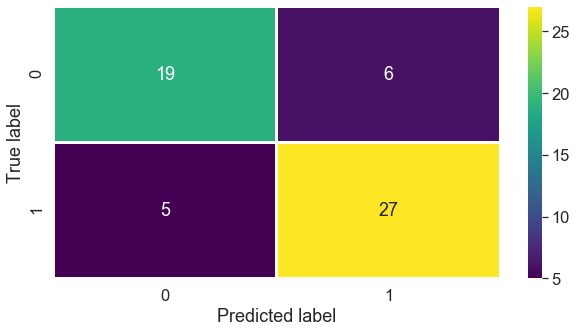

In [55]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

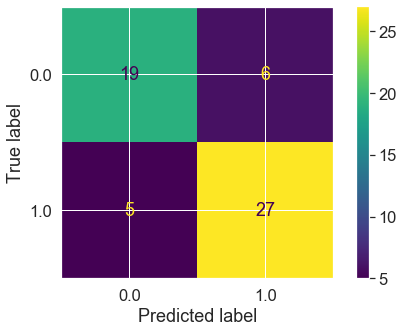

In [56]:
fig , ax = plt.subplots(figsize=(8,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        25
         1.0       0.82      0.84      0.83        32

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



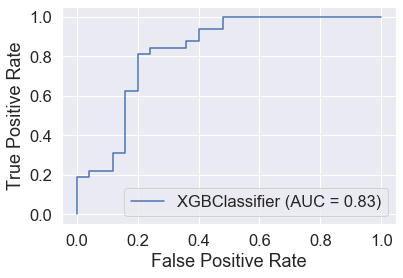

In [58]:
plot_roc_curve(xgbmodel,X_test_scaled,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [59]:
X.columns

Index(['tenure', 'age', 'address', 'income', 'employ', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet',
       'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'ed_2.0',
       'ed_3.0', 'ed_4.0', 'ed_5.0', 'custcat_2.0', 'custcat_3.0',
       'custcat_4.0'],
      dtype='object')

In [60]:
xgbmodel.get_booster().feature_names = ['tenure', 'age', 'address', 'income', 'employ', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet',
       'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'ed_2.0',
       'ed_3.0', 'ed_4.0', 'ed_5.0', 'custcat_2.0', 'custcat_3.0',
       'custcat_4.0']

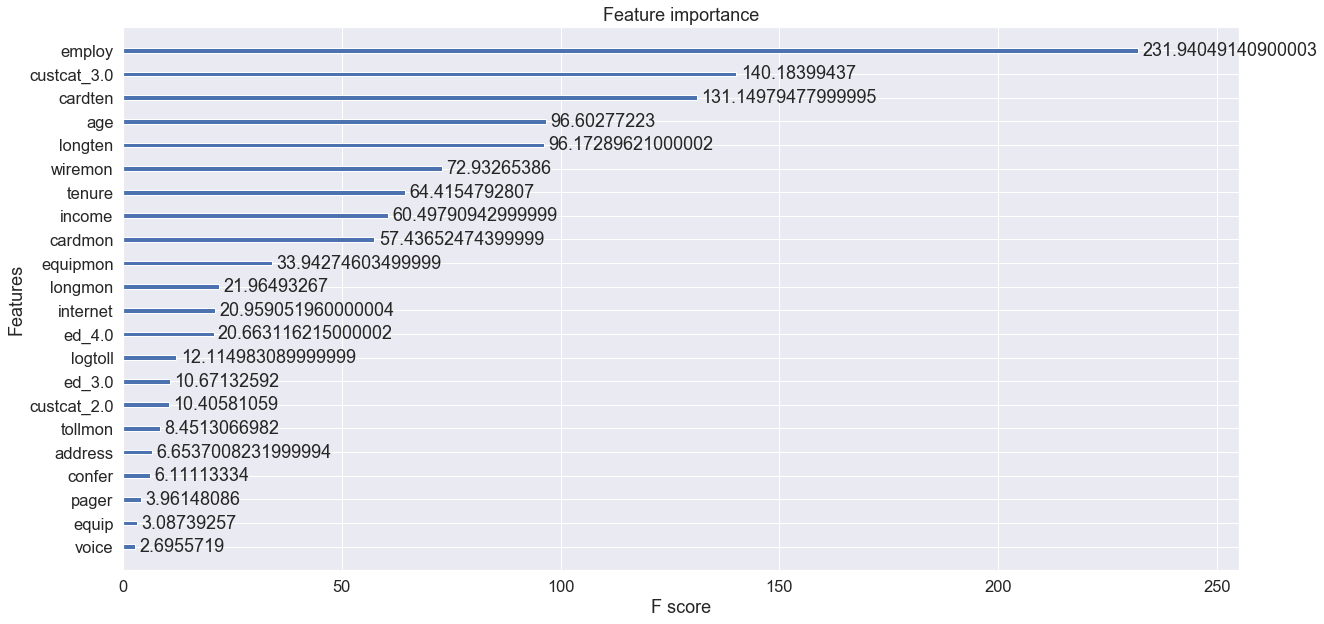

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax, importance_type='total_gain')
plt.show()

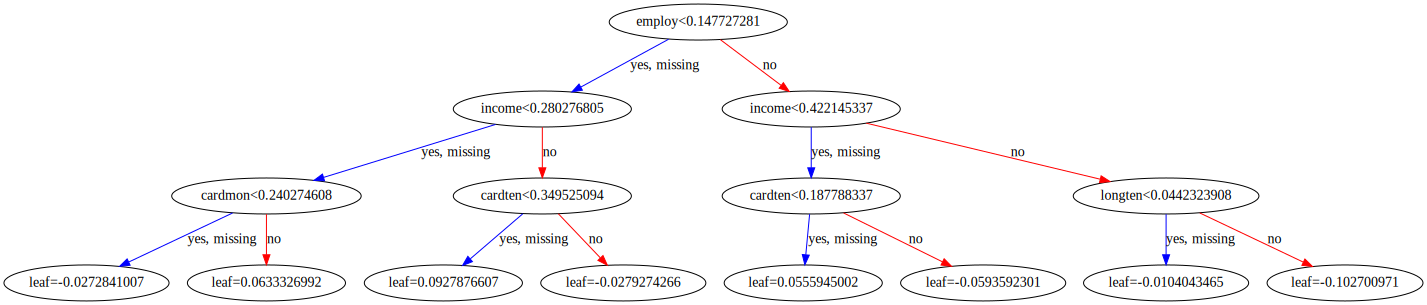

In [62]:
xgb.to_graphviz(xgbmodel,num_trees=30)

### Cross-Validation

In [63]:
cv = cross_val_score(xgbmodel,X_train_scaled,y_train,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [64]:
cv.mean()

0.8459903381642512

### Model Tuning

### Using RandomSearchCV

In [65]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [66]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [67]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [68]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [69]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=2,
              learning rate=0.14, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=2, missing=None, n_estimators=800,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7999999999999999,
              verbosity=1)

In [70]:
randm.best_score_

0.8106280193236716

In [71]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 800,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning rate': 0.14,
 'gamma': 2,
 'colsample_bytree': 0.5}

### Final Model

In [72]:
xgbnew = XGBClassifier(random_state=0, n_estimators=600, objective='binary:logistic',max_depth=3,
                      gamma=4, min_child_weight=2,learning_rate=0.29,subsample=0.5,colsample_bytree=0.5)

In [73]:
xgbnew.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.350877
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.368421
[2]	validation_0-error:0.298246
[3]	validation_0-error:0.22807
[4]	validation_0-error:0.315789
[5]	validation_0-error:0.175439
[6]	validation_0-error:0.263158
[7]	validation_0-error:0.210526
[8]	validation_0-error:0.210526
[9]	validation_0-error:0.210526
[10]	validation_0-error:0.22807
[11]	validation_0-error:0.22807
[12]	validation_0-error:0.210526
[13]	validation_0-error:0.22807
[14]	validation_0-error:0.245614
[15]	validation_0-error:0.22807
Stopping. Best iteration:
[5]	validation_0-error:0.175439



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=4,
              learning_rate=0.29, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [74]:
y_pred = xgbnew.predict(X_test_scaled)

In [75]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1.])

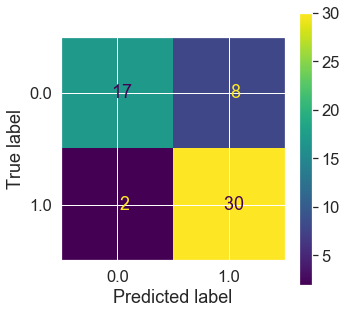

In [76]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbnew,X_test_scaled,y_test,values_format='4g',ax=ax)
plt.show()

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77        25
         1.0       0.79      0.94      0.86        32

    accuracy                           0.82        57
   macro avg       0.84      0.81      0.81        57
weighted avg       0.84      0.82      0.82        57



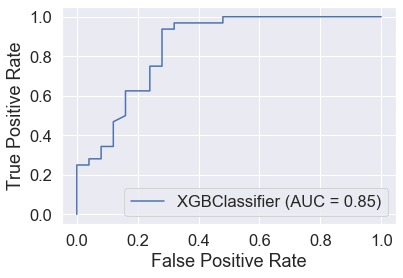

In [78]:
plot_roc_curve(xgbnew,X_test_scaled,y_test)
plt.show()

### Save the Model

In [79]:
filename = 'modelcustomer.sav'
dump(xgbnew,open(filename,'wb'))